In [95]:
import numpy as np
from matplotlib import pyplot as plt

# Monitoring the Annhilation between two ISOLATED kinks

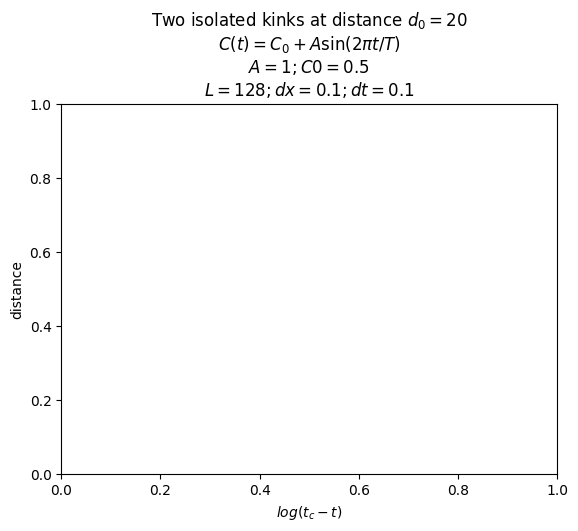

In [96]:
fig, ax = plt.subplots()
ax.set_xlabel("$log (t_c-t)$")
ax.set_ylabel("distance")
ax.set_title("Two isolated kinks at distance $d_0=20$\n$C(t)=C_0+A\sin(2\pi t/T)$\n$A=1; C0=0.5$\n$L=128; dx=0.1; dt=0.1$")

# Save the FITTED slopes for the different simulations
Cbar_list = np.array([])
T_list = np.array([])
A_list = np.array([])
Slope_list = np.array([])
tc_list = np.array([])

(over)Estimated collapse time: 2985.1


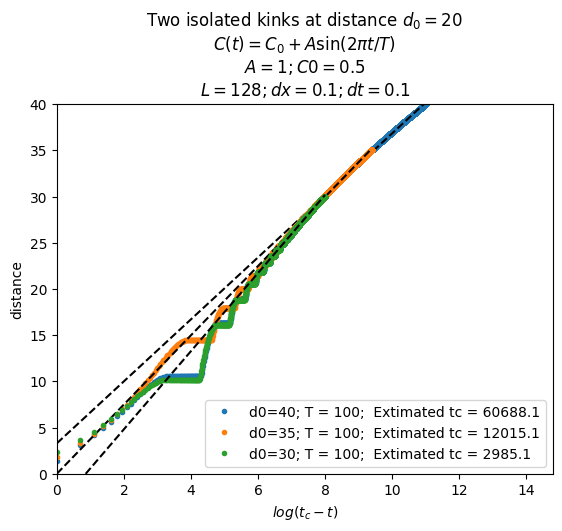

In [101]:
d0 = 30
""" Save folder """
Cbar = 0.5
T = 100
A = 1
dx = 0.1
dt_simul = 0.1
folder = "../.saves/twokinks/"
filename = "d0="+str(round(d0))+"/Cbar="+str(Cbar)+"/T="+str(T)+"/A="+str(A)


""" ESTIMATE tc """
d_tresh = dx

f = open(folder + filename + "/filekinkdist.dat", "r")
i_tc = 0
tc = 0
dt = 0
for row in f:
    a, b = row.split(" ")
    # Measure dt
    if i_tc == 0:
        dt = float(a)
    if i_tc == 1:
        dt = float(a)-dt
    # Estimate t_c
    if float(b) > d_tresh and tc==0:
        i_tc = i_tc + 1
    else:
        if tc == 0:
            tc = float(a)
if tc == 0:  #This happens when you do a simulation where tc is very very large and so the simulation ends before the cohalecence
    # In this case, we extimate tc with a fit, based on high-T data
    c = np.array([2.04472069, -17.65159967,  44.54959137])
    tc = np.exp(c[2]+c[1]*np.log(T)+c[0]*np.log(T)**2)
    print("(fit)Estimated collapse time: "+str(tc))
else:    
    print("(over)Estimated collapse time: "+str(tc))

""" PLOT d v.s tc-t """
f = open(folder + filename + "/filekinkdist.dat", "r")

#tc = 509
#i_tc = int(tc/dt)

N = 10000000  # Big number (to store ANY data in the save folder)
t = np.zeros(N)
dists = np.ones(N)*(-1)
i = 0
for row in f:
    a, b = row.split(" ")
    t[i] = float(a)
    #t[i] = np.exp(d0) - float(a)    # e^d0 - t
    #Check if they (do not) overlap
    #if 2*np.sqrt(C[i]/2) < float(b):
    dists[i] = float(b)
    #else:
    #    print(float(b))
    i = i + 1
#print(tc-t[i_tc])
t = t[0:i_tc]
logt = np.log(tc*np.ones(len(t))-t)
dists = dists[0:i_tc]
logdists = np.log(dists)

#Plot data (without showing it)
#llabel = "T="+str(T)+"; Extimated tc = "+str(tc)
#llabel = "A="+str(A)+"; Extimated tc = "+str(tc)
llabel = "d0="+str(d0)+"; T = "+str(T)+";  Extimated tc = "+str(tc)
#llabel = "dt="+str(dt_simul)+"; T="+str(T)+"; tc = "+str(tc)

ax.plot(logt, dists,'.',label=llabel)
ax.legend()

# Plot
ax.set_xlim(np.log(dt),14.8)
ax.set_ylim(0,40)

#FIT
""" NOTE: The data is collected from right to left, as the x-axis shows tc-t and NOT +t !!! So we FLIP the arrays before the FIT"""
logtmin = 6
imin = int((tc-np.exp(logtmin))/dt)
imax = 0
fit_logt = np.flip(logt[imax:imin])
fit_dists = np.flip(dists[imax:imin])

c = np.polyfit(fit_logt, fit_dists, deg=1)
ax.plot(np.flip(logt), c[0]*np.flip(logt)+c[1]*np.ones(len(logt)),'--',color="black")

# Save Fitted slope
Cbar_list = np.append(Cbar_list,Cbar)
T_list = np.append(T_list,T)
A_list = np.append(A_list,A)
Slope_list = np.append(Slope_list,c[0])
# Save extimated tc
tc_list = np.append(tc_list,tc)

fig

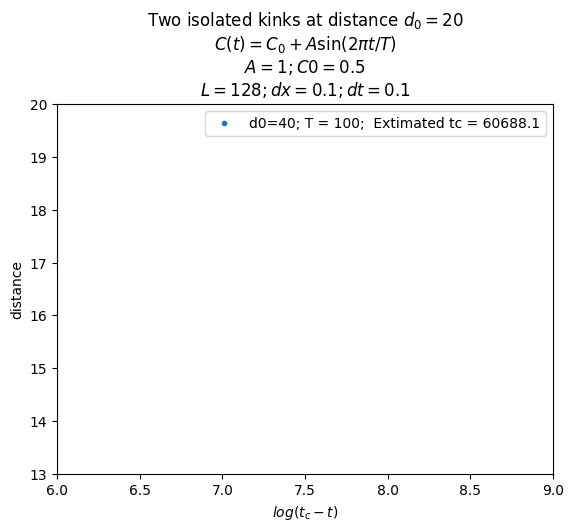

In [98]:
# Plot FAR from annhilation
ax.set_xlim(6,9)
ax.set_ylim(13,20)
fig

It seems to hold an asymptotic(far from cohalecence, big d) law
$$d(t)\sim \log[(t_c(\bar{C},A,T)-t)^{n(\bar{C},A,T)}]$$

Remember that in the limit $T\rightarrow 0$ we expect the same dynamics of a constant $C=\bar{C}$, that is
$$d_{\text{costant}}\sim \log[(t_c-t)]$$
with $t_c$ not dependent on $C$ but only on the initial distance $d_0$.

TypeError: expected non-empty vector for x

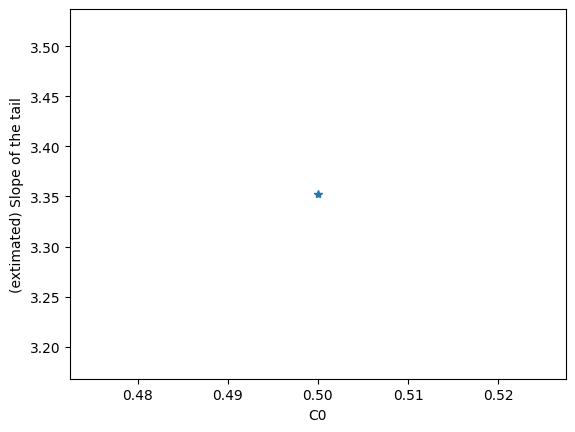

In [99]:
# Plot the exponent n
fig_slope, ax_slope = plt.subplots()
ax_slope.plot(Cbar_list, Slope_list,'*')
ax_slope.set_xlabel("C0")
ax_slope.set_ylabel("(extimated) Slope of the tail")
#ax_slope.set_xscale("log")
#ax_slope.set_yscale("log")

c = np.polyfit(Cbar_list[1:len(Cbar_list)-1], Slope_list[1:len(Cbar_list)-1],deg=1)
print(c)
fit_x = np.linspace(min(Cbar_list),max(Cbar_list),1000)
fit_y = np.polyval(c, fit_x)
fig_fit, ax_fit = plt.subplots()
ax_fit.plot(Cbar_list, Slope_list, '*')
ax_fit.plot(fit_x, fit_y,'-')
ax_fit.set_xlabel("C0")
ax_fit.set_ylabel("(extimated) Slope of the tail")
ax_fit.set_title("y = "+str(round(c[1],3))+"+"+str(round(c[0],3))+"x")
#ax_fit.set_ylim(1.1,2.1)

[ 2.355085    7.49271479 14.16084883]
(extimated) tc = 1.1627247200572109e+19


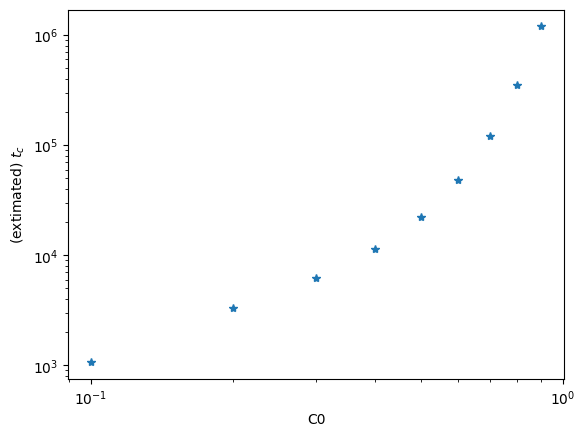

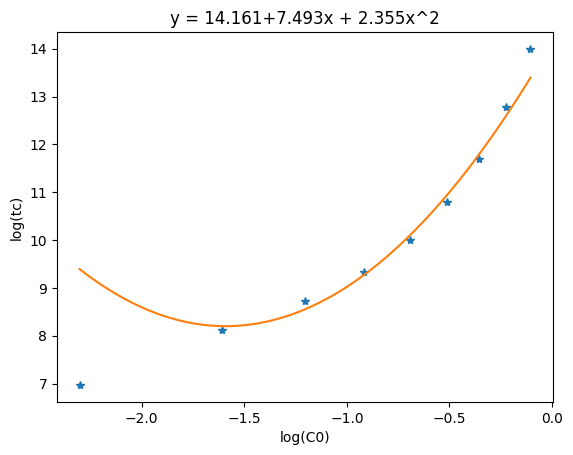

In [158]:
# Plot the cohalecence time tc
fig_tc, ax_tc = plt.subplots()
ax_tc.plot(Cbar_list, tc_list,'*')
ax_tc.set_xlabel("C0")
ax_tc.set_ylabel("(extimated) $t_c$")
ax_tc.set_xscale("log")
ax_tc.set_yscale("log")

c = np.polyfit(np.log(Cbar_list[1:len(Cbar_list)-1]), np.log(tc_list[1:len(Cbar_list)-1]),deg=2)
print(c)
fit_x = np.linspace(min(np.log(Cbar_list)),max(np.log(Cbar_list)),1000)
fit_y = c[2]*np.ones(len(fit_x))+c[1]*fit_x+c[0]*np.multiply(fit_x, fit_x)
fig_fit, ax_fit = plt.subplots()
ax_fit.plot(np.log(Cbar_list), np.log(tc_list),'*')
ax_fit.plot(fit_x, fit_y,'-')
ax_fit.set_xlabel("log(C0)")
ax_fit.set_ylabel("log(tc)")
ax_fit.set_title("y = "+str(round(c[2],3))+"+"+str(round(c[1],3))+"x + "+str(round(c[0],3))+"x^2")


# Extrapolate
T = 10
print("(extimated) tc = "+str(np.exp(c[2]+c[1]*np.log(T)+c[0]*np.log(T)**2)))